# Deconvolution on CUDA-compatible GPUs
We will now apply [pycudadecon](https://github.com/tlambert03/pycudadecon) for 3D image deconvolution.

In [1]:
from skimage.io import imread
from pyclesperanto_prototype import imshow
import matplotlib.pyplot as plt
import numpy as np

from pycudadecon import decon

We will load an image showing fluorescent intensity along lines. This 3D image was taken with a confocal microscope.

In [2]:
image = imread('../../data/DeconvolutionSampleVerticalGrid1AU-crop.tif').astype(float)
image.shape

(21, 150, 150)

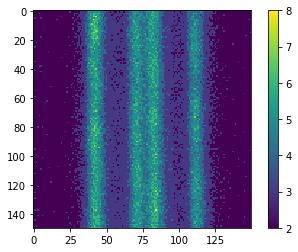

In [3]:
imshow(image, colorbar=True)

The following PSF image was extracted from images taken with the same microscope using the procedure [explained before](deconvolution:extract_psf).

(64, 64, 64)


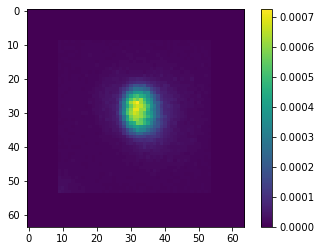

In [4]:
psf = imread('../../data/psf.tif').astype(float)

def pad_64(psf):
    pad_size = np.asarray([64,64,64])

    pad_before = ((pad_size - np.asarray(psf.shape)) / 2).astype(int)
    pad_after = pad_size - np.asarray(psf.shape) - pad_before

    pad = np.asarray((pad_before, pad_after)).T

    return np.pad(psf, pad)

psf = pad_64(psf)

print(psf.shape)

imshow(psf, colorbar=True)

(64, 64, 64)


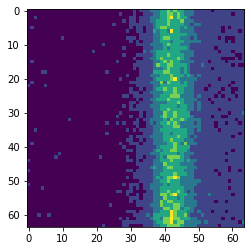

In [5]:
image = pad_64(image[:,20:84,0:64])
print(image.shape)
imshow(image)

We can now deconvolve the image using pycudadecon's `decon()` function. It accepts file names as well as images as input.

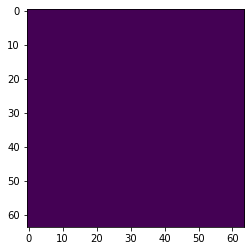

In [6]:
deconvolved = decon(image, psf)

imshow(deconvolved)

In [7]:
deconvolved.min()

0.0

In [8]:
deconvolved.max()

0.0

In [9]:
decon?

Signature:
decon(
    images: Union[str, numpy.ndarray, Sequence[Union[str, numpy.ndarray]]],
    psf: Union[str, numpy.ndarray],
    fpattern: str = '*.tif',
    **kwargs,
) -> Union[numpy.ndarray, List[numpy.ndarray]]
Docstring:
Deconvolve an image or images with a PSF or OTF file

If `images` is a directory, use the `fpattern` argument to select files
by filename pattern.

Parameters
----------
images : str, np.ndarray, or sequence of either
    The array, filepath, directory, or list/tuple thereof to deconvolve
psf : str or np.ndarray
    a filepath of a PSF or OTF file, or a 3D numpy PSF array.  Function will
    auto-detect whether the file is a 3D PSF or a filepath representing a 2D
    complex OTF.
fpattern : str, optional
    Filepattern to use when a directory is provided in the `images` argument,
    by default "*.tif"
**kwargs
    All other kwargs must be valid for either :func:`rl_init` or :func:`rl_decon`.

Returns
-------
np.ndarray or list of array
    The deconvolved i